# Coffee Data

*Caffeine Form is a company creating coffee cups from recycled material.
The company believes that stores with more reviews will help them to better market their
product.
The company want to focus on the types of shop that get the most reviews.
They now want a report on how types of shop and number of reviews are related.*

Region - Places where different kind of shop types can be found<br>
Place name - Unique names of shops<br>
Place type - Categorical name of shops, or types of shops<br>
Rating - The numerical value used to determine satisfaction from customers<br>
Reviews - Comments based on customers satisfaction, either good or bad<br>
Price - Categorical pricing system, $$$ is the highest <br>
Delivery option - This shows if the a particular sale was with delivery or not<br>
Dine in/Take out: This shows if people bought takeouts or ate in


## Importing Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Extraction of Datasets

In [3]:
coffee = pd.read_csv('coffee.csv')
coffee.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [4]:
coffee

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


## Data Exploration

In [5]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [6]:
coffee['Region'].unique()

array(['C', 'J', 'F', 'B', 'A', 'E', 'D', 'G', 'I', 'H'], dtype=object)

In [7]:
coffee.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


In [8]:
coffee['Dine in option'].unique()

array([nan, True], dtype=object)

In [9]:
coffee['Delivery option'].unique()

array([False,  True])

In [10]:
coffee['Takeout option'].unique()

array([nan, True], dtype=object)

In [11]:
coffee['Place type'].unique()

array(['Others', 'Cafe', 'Coffee shop', 'Espresso bar'], dtype=object)

In [12]:
coffee['Price'].unique()

array(['$$', '$', '$$$'], dtype=object)

## Data Cleaning

### Data problems
* Rating & Review column contains NaN values
* Dine in option and Take out option column contains NaN values
* Price column is an object variable

### Solutions
* Replace NaN values in the Rating and Reviews columns with the mean values in the columns
* Replace the NaN values in the Dine in and Take out option columns with 'Unknown'
* Convert the Price column to a categorical variable

**Replaced NaN with the string 'Unknown'**
* According to the data intergrity rule given by data camp

In [13]:
coffee[['Dine in option','Takeout option']] = coffee[['Dine in option','Takeout option']].fillna('Unknown')

In [21]:
coffee

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,Unknown,Unknown
1,C,Коферум,Cafe,5.0,24.0,$$,False,Unknown,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,Unknown,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


**Replacing missing values with mean values**

In [15]:
mean_rating = coffee['Rating'].mean()

In [22]:
coffee['Rating'] = coffee['Rating'].fillna(mean_rating)

In [16]:
mean_review = coffee['Reviews'].mean()

In [23]:
coffee['Reviews'] = coffee['Reviews'].fillna(mean_review)

*No Duplicates*

In [20]:
len(coffee['Place name'].duplicated())

200

## Analysis

* Determine the highest reviewed shops, regions where they can be found and their ratings

## The shop type with the higest review
* Coffee Shops

In [29]:
coffee.groupby('Place type')['Reviews'].sum()

Place type
Cafe            30997.494949
Coffee shop     71427.494949
Espresso bar    10519.000000
Others          11555.000000
Name: Reviews, dtype: float64

## Regions with the highest reviews
*Region 'E' had the most reviews and Region 'G' as the second highest  <br> Further analysis was done to get the Place types that were under the region*

In [24]:
coffee.groupby('Region')['Reviews'].sum()

Region
A     8440.000000
B     7799.000000
C     3876.000000
D     9238.000000
E    38773.000000
F     7655.494949
G    15292.000000
H    11831.494949
I    10889.000000
J    10705.000000
Name: Reviews, dtype: float64

### Coffee Shops are common in the regions with the most reviews

In [42]:
coffee[coffee['Region']== 'E']['Place type'].value_counts(normalize = True)

Coffee shop    0.75
Cafe           0.20
Others         0.05
Name: Place type, dtype: float64

In [27]:
coffee[coffee['Region']== 'E'].groupby('Place type').agg({'Reviews':'sum', 'Rating':'mean'}).reset_index()

,Place type,Reviews,Rating
0,Cafe,3973.0,4.750000
1,Coffee shop,33601.0,4.653333
2,Others,1199.0,4.600000


In [28]:
coffee[coffee['Region']== 'G'].groupby('Place type').agg({'Reviews':'sum', 'Rating':'mean'}).reset_index()

,Place type,Reviews,Rating
0,Cafe,4677.0,4.725000
1,Coffee shop,3641.0,4.850000
2,Espresso bar,4760.0,4.680000
3,Others,2214.0,4.866667


## Other data manipulation

### Total Reviews and Ratings across place types
*Coffee shops have higher amounts of reviews across shops, but other types have higher ratings*

In [31]:
coffee.groupby('Place type').agg({'Reviews': 'sum', 'Rating':'mean'}).reset_index()

,Place type,Reviews,Rating
0,Cafe,30997.494949,4.599373
1,Coffee shop,71427.494949,4.681068
2,Espresso bar,10519.000000,4.690000
3,Others,11555.000000,4.724000


### Delivery options with the most reviews
* Sales without Delivery options were mostly reviewed except for 'other' shop type
* If number of review is a success criteria, Sales without delivery are better for the company

In [30]:
coffee.groupby(['Place type', 'Delivery option'])['Reviews'].sum()

Place type    Delivery option
Cafe          False              19468.494949
              True               11529.000000
Coffee shop   False              45766.494949
              True               25661.000000
Espresso bar  False               5802.000000
              True                4717.000000
Others        False               4981.000000
              True                6574.000000
Name: Reviews, dtype: float64

## Data Visualisations
*The visulaizations below are representations of the analysis above*

### Relationship between Rating and Review
* The plot below shows that places have average ratings of 4.4-4.8. 
* It also shows that there are less delivered sales

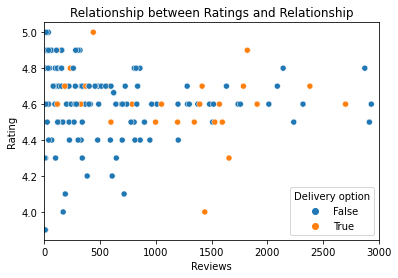

In [49]:
sb.scatterplot(data = coffee, x = 'Reviews', y= 'Rating', hue = 'Delivery option');
plt.xlim(0,3000);
plt.title('Relationship between Ratings and Relationship');

### Correlation
* Theres a low negative correlation between reviews and rating

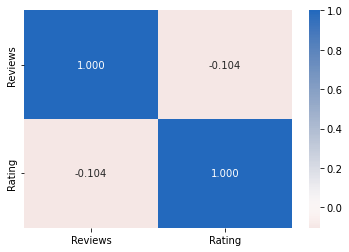

In [65]:
sb.heatmap(coffee[['Reviews','Rating']].corr(),cmap ='vlag_r', center = 0, annot = True, fmt = '.3f');

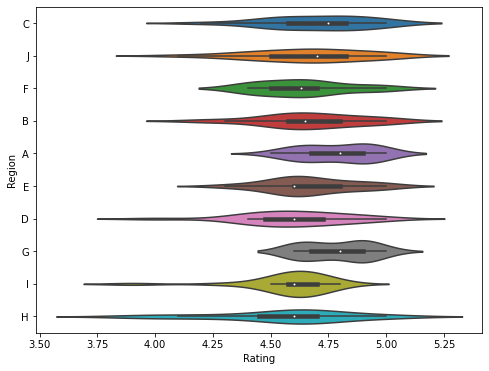

In [57]:
plt.figure(figsize = (8,6))
sb.violinplot(data = coffee, y = 'Region', x= 'Rating');

### Distribution of Ratings
The plot below shows a unimodal distribution<br>
The 4.6 rating is the highest


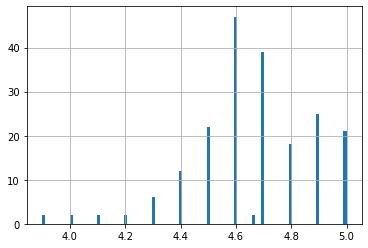

In [52]:
coffee['Rating'].hist(bins = 100);

### Distribution of Reviews
* Majority of the reviews were between 0-2500
* Reviews less than 2500 were the highest

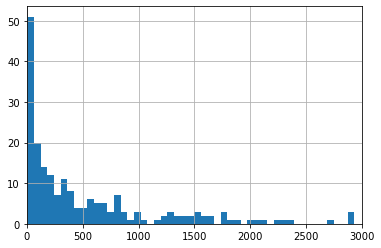

In [56]:
coffee['Reviews'].hist(bins = 300);
plt.xlim(0,3000);

### Shop types in relationship to Reviews
* Coffee shop is the highest reviewed shop, followed by the Espresso bar

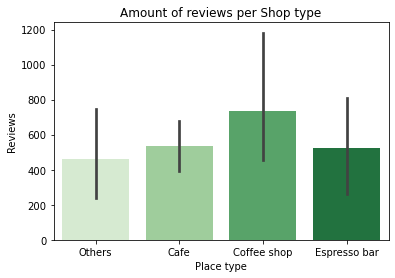

In [58]:
sb.barplot(data = coffee, x= 'Place type', y = 'Reviews', palette = 'Greens');
plt.title('Amount of reviews per Shop type');

## Summary

* The coffee shop is the highest reviewed shop type and can there by be invested in
* Region E and G are the region with the most reviews, with the coffee shop and Espresso bars as the highest review respectively
* The 'Other' shops are rated higher than other types